# Taller 3

## Objetivos

El objetivo de este taller es construir un modelo heurístico para la evaluación de la susceptibilidad por movimientos en masa, a partir de las variables seleccionadas en el Taller 2.

## Actividades a realizar

En el presente ejercicio se va a utilizar un metodo combinando un análisis heuristico y algebra de mapas. El primero de ellos Analisis Jerárquico de Procesos (AHP) para obtener los pesos de las variables (w), y para los pesos de las clases  (a,b,c,d, etc) se asiganarán pesos directamente con criterio de experto. De esta forma el Indice de Susceptibildiad (IS) de cada celda será:

IS = w<sub>1</sub> a<sub>i</sub> + w<sub>2</sub> b<sub>i</sub> + w<sub>3</sub> c<sub>i</sub> + w<sub>4</sub> d<sub>i</sub>

## Python

Para definir los pesos de las varables con el método AHP, se puede utilizar python para obtener con la función linalg.eig los valores y vectores propios de la matriz de Saaty que se construye. Es importante tener en cuenta que los vectores propios generados por python están normalizados euclidinamente, por lo tanto hay que normalizarlos a la unidad (1) con la funcion norm.

In [10]:
import numpy as np

A=([[1,   1,  3,   5],
    [1,   1,  5,   3],
    [0.33,0.2,1,   0.33],
    [0.2, 0.33,  3,   1]])
B=np.array(A)
values, vectores=np.linalg.eig(B)
vector_norm=vectores/np.linalg.norm(vectores, ord=1)
print('esto son los valores propios',values)
print('esto son los vectores propios', vectores)
print('esto son los vectores propios normalizados',vector_norm)

esto son los valores propios [ 4.21699264+0.j         -0.14331656+0.97184258j -0.14331656-0.97184258j
  0.06964048+0.j        ]
esto son los vectores propios [[ 0.70337321+0.j          0.92846066+0.j          0.92846066-0.j
   0.32724899+0.j        ]
 [ 0.65515578+0.j          0.03315866-0.0117394j   0.03315866+0.0117394j
  -0.93864506+0.j        ]
 [ 0.13740741+0.j         -0.09317275-0.15712105j -0.09317275+0.15712105j
   0.05172402+0.j        ]
 [ 0.23907369+0.j         -0.16303297+0.27708403j -0.16303297-0.27708403j
   0.09580276+0.j        ]]
esto son los vectores propios normalizados /n [[ 0.40540007+0.j          0.53513271+0.j          0.53513271-0.j
   0.18861504+0.j        ]
 [ 0.37760921+0.j          0.01911151-0.00676618j  0.01911151+0.00676618j
  -0.54100265+0.j        ]
 [ 0.07919689+0.j         -0.05370156-0.09055915j -0.05370156+0.09055915j
   0.02981194+0.j        ]
 [ 0.13779383+0.j         -0.09396658+0.15970168j -0.09396658-0.15970168j
   0.05521741+0.j        ]]


Los anteriores valores corresponden a los valores propios de la matriz. Se obtiene entonces el vector propio del mayor valor propio, en ese caso corresponde al primer valor propio

In [11]:
w=vector_norm[:,0]
print(w)

[0.40540007+0.j 0.37760921+0.j 0.07919689+0.j 0.13779383+0.j]


Estos valores significan que la primera variable tiene un peso del 40%, la segunda variable del 37%, la tercera variable del 8% y la cuarta variable 13%.

Se procede entonces a importar cada uno de los mapas a utilizar. En este caso 4 mapas de las variables predictoras que se utilizaron en el método AHP.

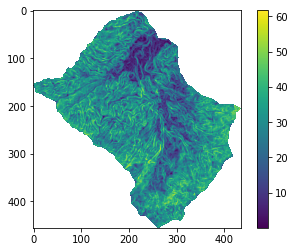

In [13]:
import rasterio as rio
import matplotlib.pyplot as plt
raster = rio.open(r'G:\My Drive\CATEDRA\MACHINE LEARNING\datos\raster/slope_rad')
pendiente=raster.read(1)
pendiente=np.where(pendiente==-3.4028234663852886e+38,np.nan,pendiente)
pendiente=pendiente*180/np.pi
plt.imshow(pendiente);
plt.colorbar();

De acuerdo con el método estos mapas se deben reclasificar en clases y pesos con criterio de experto. Se recomienda utilizar los rangos recomendados por el SGC o por referencias conocidas. Este ejercicio simplemente señala el procedimiento, pero no tienen ningun análisis la reclasificacion.

<ipython-input-14-16f0e258f282>:1: RuntimeWarning: invalid value encountered in greater_equal
  pendiente_re=np.where ( (np.logical_and (pendiente>=0, pendiente<10 )),0.1,pendiente );
<ipython-input-14-16f0e258f282>:1: RuntimeWarning: invalid value encountered in less
  pendiente_re=np.where ( (np.logical_and (pendiente>=0, pendiente<10 )),0.1,pendiente );
<ipython-input-14-16f0e258f282>:2: RuntimeWarning: invalid value encountered in greater_equal
  pendiente_re=np.where ( (np.logical_and (pendiente_re>=10, pendiente_re<30 )),0.5,pendiente_re);
<ipython-input-14-16f0e258f282>:2: RuntimeWarning: invalid value encountered in less
  pendiente_re=np.where ( (np.logical_and (pendiente_re>=10, pendiente_re<30 )),0.5,pendiente_re);
<ipython-input-14-16f0e258f282>:3: RuntimeWarning: invalid value encountered in greater_equal
  pendiente_re=np.where ( pendiente_re>=30,1,pendiente_re);


[0.1 0.5 1.  ... nan nan nan]


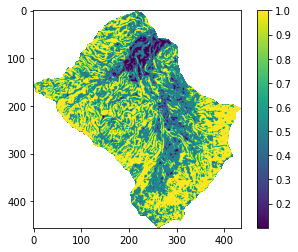

In [14]:
pendiente_re=np.where ( (np.logical_and (pendiente>=0, pendiente<10 )),0.1,pendiente );
pendiente_re=np.where ( (np.logical_and (pendiente_re>=10, pendiente_re<30 )),0.5,pendiente_re);
pendiente_re=np.where ( pendiente_re>=30,1,pendiente_re);
print(np.unique(pendiente_re));
plt.imshow(pendiente_re);
plt.colorbar();

[15. 18. nan ... nan nan nan]


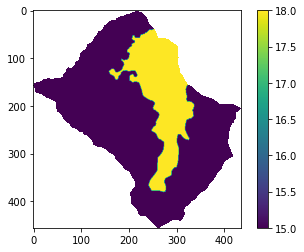

In [15]:
geologia=np.loadtxt(r'G:\My Drive\CATEDRA\MACHINE LEARNING\datos\raster/gamma.asc', skiprows=6)
geologia=np.where(geologia==-9999.,np.nan,geologia)
print(np.unique(geologia))
plt.imshow(geologia);
plt.colorbar();

<ipython-input-16-855cef618c5c>:1: RuntimeWarning: invalid value encountered in greater_equal
  geologia_re=np.where ( geologia>=18,1,geologia);
<ipython-input-16-855cef618c5c>:2: RuntimeWarning: invalid value encountered in greater_equal
  geologia_re=np.where ( geologia_re>=15,0.1,geologia_re);


[0.1 1.  nan ... nan nan nan]


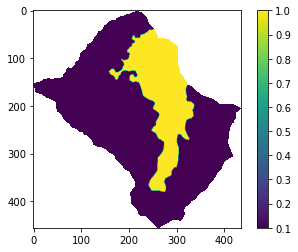

In [16]:
geologia_re=np.where ( geologia>=18,1,geologia);
geologia_re=np.where ( geologia_re>=15,0.1,geologia_re);
print(np.unique(geologia_re))
plt.imshow(geologia_re);
plt.colorbar();

[  0. 100. 200. ...  nan  nan  nan]


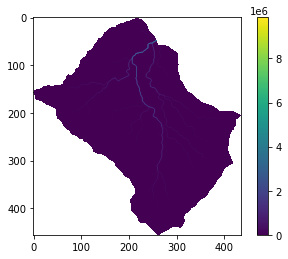

In [17]:
raster = rio.open(r'G:\My Drive\CATEDRA\MACHINE LEARNING\datos\raster/flowacum_m2')
flujo=raster.read(1)
flujo=np.where(flujo==-3.4028234663852886e+38,np.nan,flujo)
print(np.unique(flujo))
plt.imshow(flujo);
plt.colorbar();

<ipython-input-19-bc8ce2738c1f>:1: RuntimeWarning: invalid value encountered in less
  flujo_re=np.where ( flujo<200,0.2,flujo);
<ipython-input-19-bc8ce2738c1f>:2: RuntimeWarning: invalid value encountered in greater_equal
  flujo_re=np.where ( (np.logical_and (flujo_re>=200, flujo_re<1000 )),0.5,flujo_re);
<ipython-input-19-bc8ce2738c1f>:2: RuntimeWarning: invalid value encountered in less
  flujo_re=np.where ( (np.logical_and (flujo_re>=200, flujo_re<1000 )),0.5,flujo_re);
<ipython-input-19-bc8ce2738c1f>:3: RuntimeWarning: invalid value encountered in greater_equal
  flujo_re=np.where ( (np.logical_and (flujo_re>=1000, flujo_re<5000 )),0.9,flujo_re);
<ipython-input-19-bc8ce2738c1f>:3: RuntimeWarning: invalid value encountered in less
  flujo_re=np.where ( (np.logical_and (flujo_re>=1000, flujo_re<5000 )),0.9,flujo_re);
<ipython-input-19-bc8ce2738c1f>:4: RuntimeWarning: invalid value encountered in greater_equal
  flujo_re=np.where ( flujo_re>=5000,0.1,flujo_re);


[0.1 0.2 0.5 ... nan nan nan]


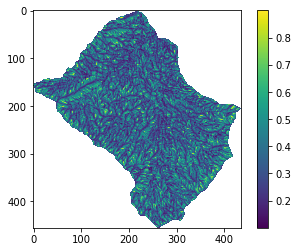

In [19]:
flujo_re=np.where ( flujo<200,0.2,flujo);
flujo_re=np.where ( (np.logical_and (flujo_re>=200, flujo_re<1000 )),0.5,flujo_re);
flujo_re=np.where ( (np.logical_and (flujo_re>=1000, flujo_re<5000 )),0.9,flujo_re);
flujo_re=np.where ( flujo_re>=5000,0.1,flujo_re);
print(np.unique(flujo_re))
plt.imshow(flujo_re);
plt.colorbar();

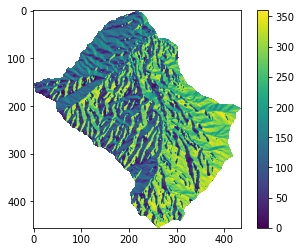

In [20]:
raster = rio.open(r'G:\My Drive\CATEDRA\MACHINE LEARNING\datos\raster/aspecto')
aspecto=raster.read(1)
aspecto=np.where(aspecto==-3.4028234663852886e+38,np.nan,aspecto)
plt.imshow(aspecto);
plt.colorbar();

<ipython-input-21-3388ff647126>:1: RuntimeWarning: invalid value encountered in less
  aspecto_re=np.where ( aspecto<10,1,aspecto);
<ipython-input-21-3388ff647126>:2: RuntimeWarning: invalid value encountered in greater_equal
  aspecto_re=np.where ( (np.logical_and (aspecto_re>=10, aspecto_re<200 )),0.4,aspecto_re);
<ipython-input-21-3388ff647126>:2: RuntimeWarning: invalid value encountered in less
  aspecto_re=np.where ( (np.logical_and (aspecto_re>=10, aspecto_re<200 )),0.4,aspecto_re);
<ipython-input-21-3388ff647126>:3: RuntimeWarning: invalid value encountered in greater
  aspecto_re=np.where ( aspecto_re>200,0,aspecto_re);


[0.  0.4 1.  ... nan nan nan]


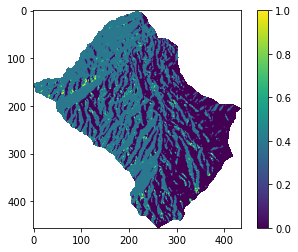

In [21]:
aspecto_re=np.where ( aspecto<10,1,aspecto);
aspecto_re=np.where ( (np.logical_and (aspecto_re>=10, aspecto_re<200 )),0.4,aspecto_re);
aspecto_re=np.where ( aspecto_re>200,0,aspecto_re);
print(np.unique(aspecto_re))
plt.imshow(aspecto_re);
plt.colorbar();

In [22]:
print(w[0],w[1],w[2],w[3])

(0.40540006970266357+0j) (0.3776092054408299+0j) (0.07919689492598939+0j) (0.13779382993051706+0j)


Finalmente se aplica la ecuacion de IS y se obtiene el mapa.

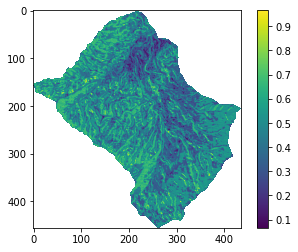

In [23]:
IS=0.47*pendiente_re+0.05*geologia_re+0.14*flujo_re+0.32*aspecto_re
plt.imshow(IS);
plt.colorbar();

Para exportar el mapa como archivo tiff y poder trabajar en un GIS, se puede utilizar la libreria rasterio, y sustraer los datos de georeferenciacion y tamaño del mapa de aspecto en ese caso.

In [25]:
meta=raster.profile
raster_transform = meta['transform']
raster_crs = meta['crs']

with rio.open('IS.TIF', 'w', 
              driver='Gtiff',height=aspecto.shape[0],width=aspecto.shape[1],count=1,
              dtype='float64',nodata=-999,crs=raster_crs,transform=raster_transform) as dst:
    dst.write(IS,1);